### dataset taken from https://www.kaggle.com/c/demand-forecasting-kernels-only/data

# step 1: data preprocessing and analysis

# i .preprocessing

In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import statsmodels.api as sm
# rcParams['figure.figsize'] = 15, 6# width 10 hieght 6

dataset = pd.read_csv("train.csv")#load dataset

del dataset['store']

dataset['date'] = pd.to_datetime(dataset['date'])#convert to date time object
itemno = 4#select item (1 to 50)
dffiltered = dataset[dataset['item'] == itemno]#select one item
print(dffiltered.head())
a=dffiltered.groupby(dffiltered['date'].dt.date)# sum all sold items at that dayZZZZZZZZZZZZZZZZZZZZZZCULPR
dffiltered=a.sum()#grouped or summed
print(dffiltered.head())
del dffiltered['item']
#index to date time index
dffiltered.index = pd.to_datetime(dffiltered.index)
# for example, to get the sum each day:
# df.groupby(df['date'].dt.date).sum()
train, test = np.split(dffiltered, [int(.8*len(dffiltered))])#first ko ma .8 jancha
df=train
print(df.head())
print(df.values[2])

            date  item  sales
54780 2013-01-01     4     10
54781 2013-01-02     4     11
54782 2013-01-03     4      8
54783 2013-01-04     4     19
54784 2013-01-05     4     12
            item  sales
date                   
2013-01-01    40    102
2013-01-02    40    110
2013-01-03    40    112
2013-01-04    40    138
2013-01-05    40    144
            sales
date             
2013-01-01    102
2013-01-02    110
2013-01-03    112
2013-01-04    138
2013-01-05    144
[112]


# ii. analysis

In [36]:
dfWeek=df.resample('W', how='sum')
print(dfWeek.head(5))
dfMonth=df.resample('M', how='sum')
print(dfMonth.head())
print(df.tail())

            sales
date             
2013-01-06    734
2013-01-13    832
2013-01-20    867
2013-01-27    834
2013-02-03    926
            sales
date             
2013-01-31   3718
2013-02-28   3920
2013-03-31   5246
2013-04-30   5834
2013-05-31   6439
            sales
date             
2016-12-26    129
2016-12-27    161
2016-12-28    153
2016-12-29    175
2016-12-30    187


c:\users\acer\desktop\minor\arima\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.
c:\users\acer\desktop\minor\arima\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

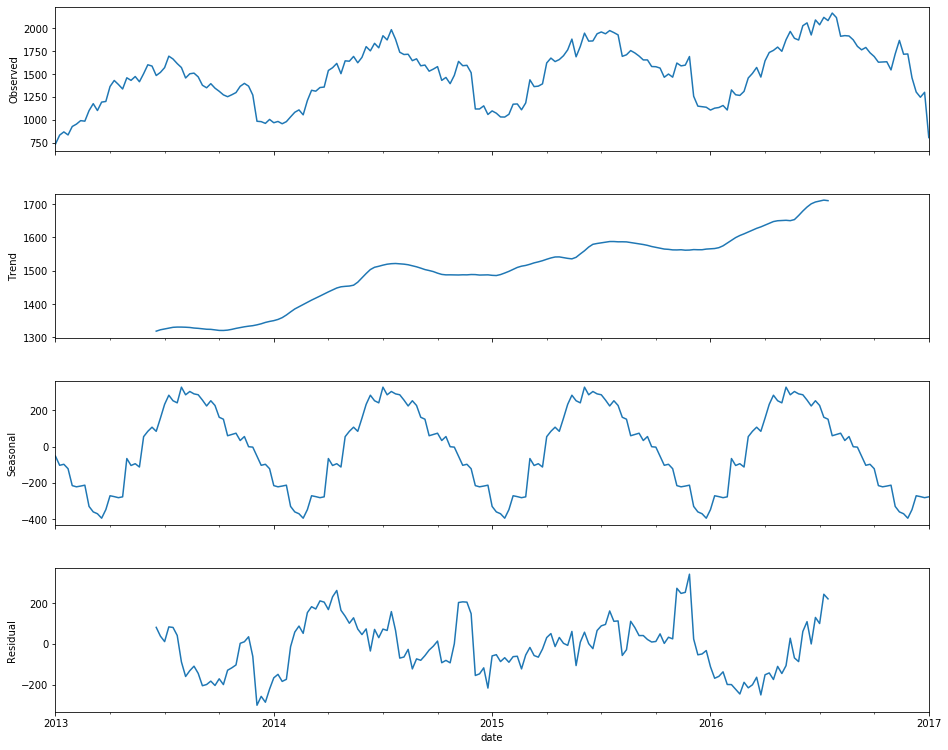

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dfWeek['sales'], model='additive', freq=48)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [38]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 20, cutoff = 0.01):
        #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)



In [39]:
#pacf acf arko library bata
def bar_plot(timeseriesData,lagNum=40):
    import statsmodels.api as sm
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(timeseriesData, lags=lagNum, ax=ax1) # 
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(timeseriesData, lags=lagNum, ax=ax2)# , lags=40

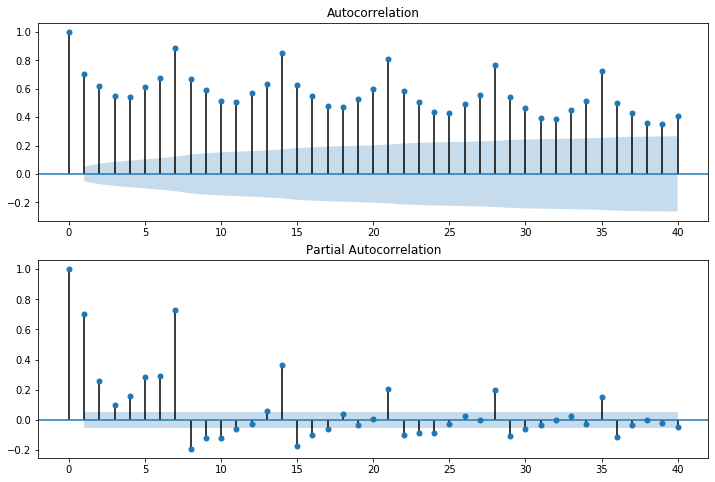

In [40]:
bar_plot(df)

# step 2 : Dickey fuller test for stationarity

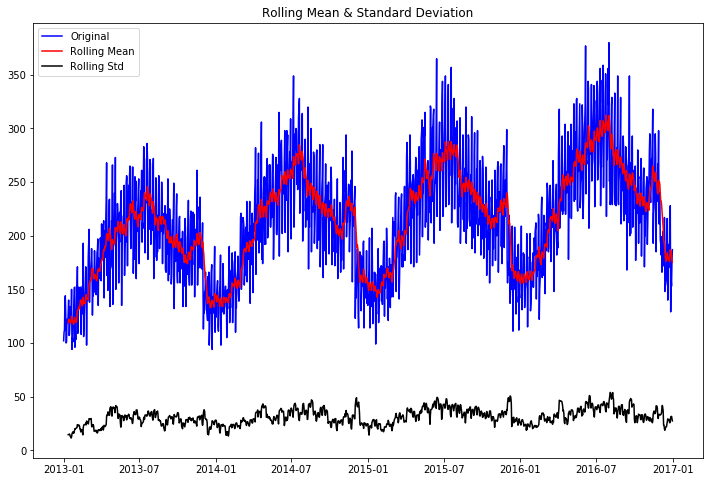

Results of Dickey-Fuller Test:
p-value = 0.1327. The series is likely non-stationary.
Test Statistic                   -2.432600
p-value                           0.132746
#Lags Used                       20.000000
Number of Observations Used    1439.000000
Critical Value (1%)              -3.434902
Critical Value (5%)              -2.863551
Critical Value (10%)             -2.567840
dtype: float64


In [41]:
test_stationarity(df.sales, window = 12)

# here P is not less than 0.05 i.e false so <br>
# Step 3: Calculate difference series

In [42]:
first_diff = df.sales - df.sales.shift(1)# right tira shift show first becomes nan
first_diff = first_diff.dropna(inplace = False)



# carry out  step 2 i.e dickey fuller test

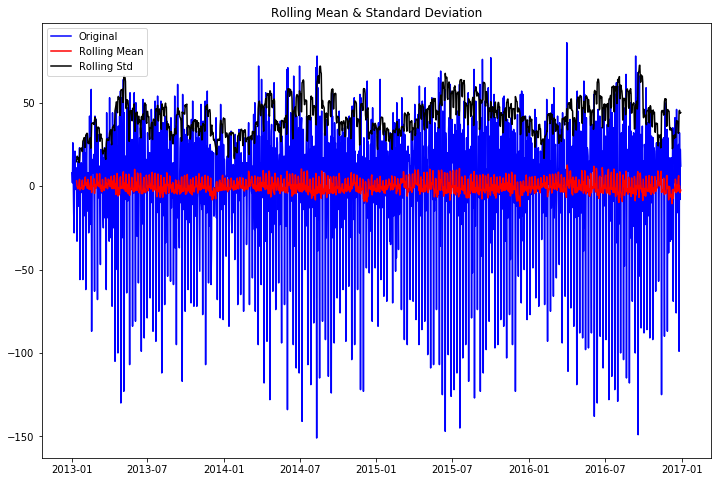

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.004883e+01
p-value                        1.430419e-17
#Lags Used                     2.000000e+01
Number of Observations Used    1.438000e+03
Critical Value (1%)           -3.434906e+00
Critical Value (5%)           -2.863552e+00
Critical Value (10%)          -2.567841e+00
dtype: float64


In [43]:
test_stationarity(first_diff, window = 12)

In [44]:
first_diff = pd.DataFrame({'date':first_diff.index, 'sales':first_diff.values})
print(type(first_diff))

print(first_diff)
first_diff['date'] = pd.to_datetime(first_diff['date'])
first_diff = first_diff.set_index('date') 
print(first_diff)


<class 'pandas.core.frame.DataFrame'>
           date  sales
0    2013-01-02    8.0
1    2013-01-03    2.0
2    2013-01-04   26.0
3    2013-01-05    6.0
4    2013-01-06  -16.0
5    2013-01-07  -28.0
6    2013-01-08    1.0
7    2013-01-09   21.0
8    2013-01-10   -2.0
9    2013-01-11   -1.0
10   2013-01-12   11.0
11   2013-01-13   10.0
12   2013-01-14  -33.0
13   2013-01-15    1.0
14   2013-01-16   11.0
15   2013-01-17   15.0
16   2013-01-18  -12.0
17   2013-01-19    5.0
18   2013-01-20   23.0
19   2013-01-21  -56.0
20   2013-01-22   11.0
21   2013-01-23   -4.0
22   2013-01-24   14.0
23   2013-01-25   12.0
24   2013-01-26   13.0
25   2013-01-27   12.0
26   2013-01-28  -56.0
27   2013-01-29   25.0
28   2013-01-30  -18.0
29   2013-01-31   28.0
...         ...    ...
1429 2016-12-01  -40.0
1430 2016-12-02   -3.0
1431 2016-12-03  -11.0
1432 2016-12-04   17.0
1433 2016-12-05  -33.0
1434 2016-12-06    8.0
1435 2016-12-07   13.0
1436 2016-12-08   17.0
1437 2016-12-09  -32.0
1438 2016-12-10   1

# Step 4: Plot ACF and PACF plots

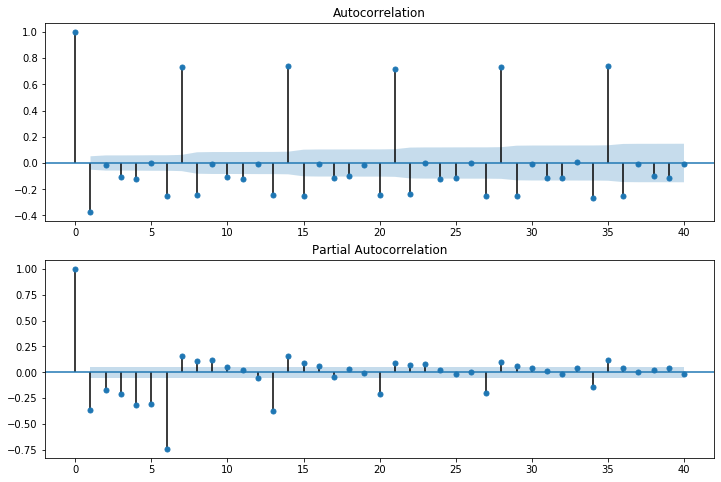

In [45]:
bar_plot(first_diff.sales)

# Step 5: Determine order of AR and MA

### From the acf and pacf plots we find that the AR order is 6 and MA order is 1.
### The series has been differenced one times so I=1

# Step 6: Fit the model

c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR model


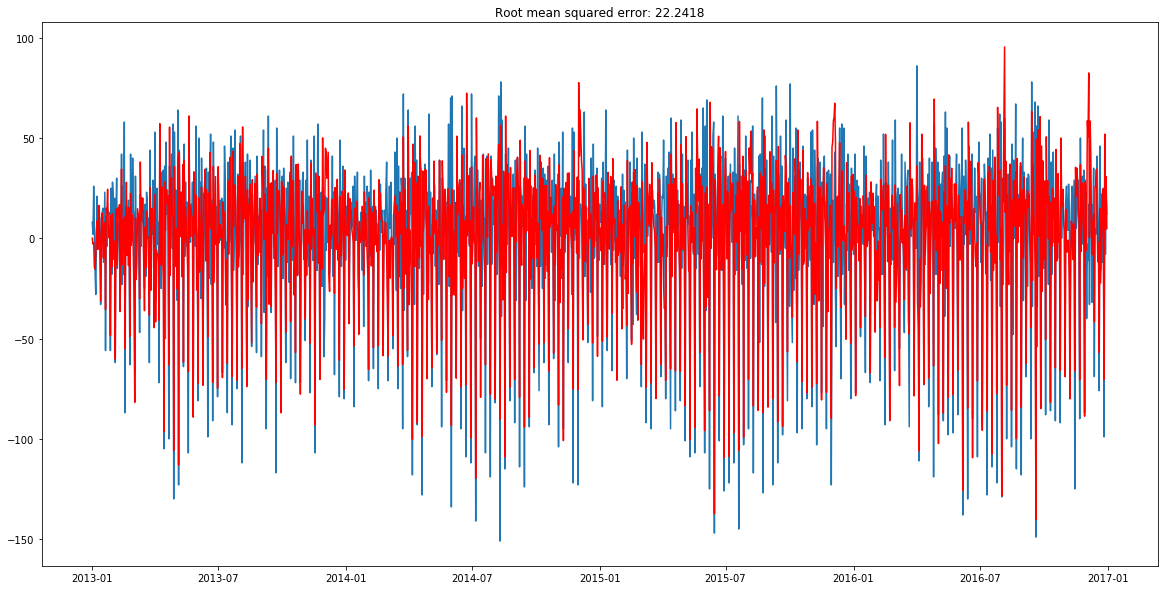

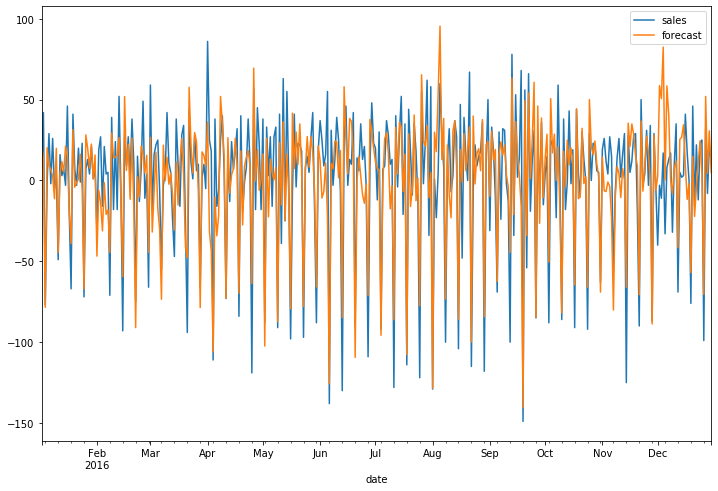

In [46]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL (p,d,q)
model = ARIMA(df, order=(6, 1, 1))  
results_ARIMA = model.fit(disp=-1)  


plt.figure(figsize=(20,10))
plt.plot(first_diff)
# print(results_AR.fittedvalues)
plt.plot(results_ARIMA.fittedvalues, color='red')
sumSquaredError = sum((results_ARIMA.fittedvalues-first_diff["sales"])**2)
meanSquaredError = sumSquaredError/len(first_diff)
rmseOfFit  = meanSquaredError**0.5
plt.title('Root mean squared error: %.4f'% rmseOfFit)
print('Plotting AR model')
first_diff['forecast'] = results_ARIMA.fittedvalues.values
# df['forecast'] = results_AR.fittedvalues

start_index = len(df)-365
end_index = len(df)-1
first_diff[start_index:end_index][['sales','forecast']].plot(figsize=(12, 8))

#RSS needs to be minimum

# Step 7: Test the model

# i. Testing the fitted values in original scale

## i. a) converting fitted values to original scale

In [47]:
#Let "xd" denote the differenced data and "x" denote the original data. 
#Then xd[n]=x[n+1]-x[n]. Therefore, x[n+1]=x[n]+xd[n]. 
#If you add the first element of first difference forecast to the real data with the same indice, then you will get the next real data forecast.
#here used xd[n] = x[n] -x[n+1] so first becomes nan
fittedOrgScale= df.copy()#data frame has values in sales
xd= results_ARIMA.fittedvalues# series has values in values
print(type(results_ARIMA.fittedvalues))

xd=pd.concat([pd.Series([0]),xd])
end=fittedOrgScale.shape[0]#for for loop in next cell
print(fittedOrgScale.values)


<class 'pandas.core.series.Series'>
[[102]
 [110]
 [112]
 ...
 [153]
 [175]
 [187]]


In [48]:
print(fittedOrgScale.values[0])
#run above to run this 
j=0
for i in fittedOrgScale.index:
    
    fittedOrgScale.values[j] = fittedOrgScale.values[j+1] + xd.values[j]
    print('adding',j,fittedOrgScale.values[j+1],'+',xd.values[j],fittedOrgScale.values[j])
    j+=1
    if j+1 ==end:
        break



[102]
adding 0 [110] + 0.0 [110]
adding 1 [112] + 0.039493191907039815 [112]
adding 2 [138] + -2.91043202360761 [135]
adding 3 [144] + -2.1927980581289965 [141]
adding 4 [128] + -14.38358399549277 [113]
adding 5 [100] + -15.436974668624554 [84]
adding 6 [101] + -8.05182715800263 [92]
adding 7 [122] + 3.77560676610552 [125]
adding 8 [120] + 8.717204303201424 [128]
adding 9 [119] + -5.516421055203866 [113]
adding 10 [130] + 16.28367413381347 [146]
adding 11 [140] + 16.322058579570253 [156]
adding 12 [107] + -6.015973559163122 [100]
adding 13 [108] + -31.29889945161957 [76]
adding 14 [119] + -0.45979451353169076 [118]
adding 15 [134] + 12.56782532042318 [146]
adding 16 [122] + -0.11105602622074251 [121]
adding 17 [127] + -9.84240804328789 [117]
adding 18 [150] + 7.350641891778411 [157]
adding 19 [94] + 7.697866773665716 [101]
adding 20 [105] + -35.59253399238801 [69]
adding 21 [101] + 14.961421643274731 [115]
adding 22 [115] + 12.270618609680106 [127]
adding 23 [127] + 24.437601864041646 

adding 336 [128] + 44.926957987165224 [172]
adding 337 [148] + 43.368367779679176 [191]
adding 338 [146] + 29.895173302759233 [175]
adding 339 [166] + 35.94773337422888 [201]
adding 340 [148] + 42.91846775386075 [190]
adding 341 [131] + -19.393393231164268 [111]
adding 342 [130] + -26.500204998944415 [103]
adding 343 [126] + 6.524471646302024 [132]
adding 344 [121] + -0.953121218113683 [120]
adding 345 [162] + 19.42198767112192 [181]
adding 346 [143] + 19.06482254013192 [162]
adding 347 [166] + 1.6507124267472015 [167]
adding 348 [98] + 0.46645020245570734 [98]
adding 349 [112] + -27.491033472183076 [84]
adding 350 [130] + 25.353688629211582 [155]
adding 351 [128] + 11.088448462281534 [139]
adding 352 [152] + -5.489337942423634 [146]
adding 353 [167] + 29.4252642740389 [196]
adding 354 [173] + -10.86621157210788 [162]
adding 355 [94] + -3.5033521517137256 [90]
adding 356 [143] + -60.83101230818808 [82]
adding 357 [142] + 20.917701226736853 [162]
adding 358 [128] + -8.661811635424593 [1

adding 677 [199] + 20.55252947323062 [219]
adding 678 [220] + -100.90020974634965 [119]
adding 679 [213] + 24.955330384807386 [237]
adding 680 [227] + 0.12554333664918715 [227]
adding 681 [235] + 19.71442341264452 [254]
adding 682 [248] + 27.882746293055057 [275]
adding 683 [247] + 2.205868321420837 [249]
adding 684 [185] + 32.41805954499048 [217]
adding 685 [204] + -45.10729971148674 [158]
adding 686 [214] + 32.62343717483077 [246]
adding 687 [235] + 6.11224856805644 [241]
adding 688 [252] + 11.753177637496098 [263]
adding 689 [224] + 1.4707829196347575 [225]
adding 690 [279] + -4.6157888035800845 [274]
adding 691 [157] + 13.17171854082273 [170]
adding 692 [210] + -75.21225712711464 [134]
adding 693 [209] + 43.780925984682725 [252]
adding 694 [227] + 5.097074284598354 [232]
adding 695 [229] + 20.334664769872337 [249]
adding 696 [235] + 20.030920088745646 [255]
adding 697 [246] + -7.3256068664872735 [238]
adding 698 [123] + 30.54481257422853 [153]
adding 699 [152] + -75.611736121334 [7

adding 1049 [218] + -80.61301831429832 [137]
adding 1050 [174] + 20.25764853303268 [194]
adding 1051 [211] + 17.954473523283994 [228]
adding 1052 [252] + 35.218795848896946 [287]
adding 1053 [266] + 14.78987601202201 [280]
adding 1054 [284] + 8.054637808934773 [292]
adding 1055 [189] + -5.167001450751336 [183]
adding 1056 [222] + -76.8160315303608 [145]
adding 1057 [218] + 27.257160871522174 [245]
adding 1058 [252] + -36.629995979721755 [215]
adding 1059 [242] + 3.5362024866905166 [245]
adding 1060 [267] + 5.265063256385345 [272]
adding 1061 [299] + 16.515780486569327 [315]
adding 1062 [176] + 6.918298208955967 [182]
adding 1063 [156] + -89.91016578112966 [66]
adding 1064 [175] + 45.366410065558625 [220]
adding 1065 [163] + 47.84539242394122 [210]
adding 1066 [176] + 58.64215920265333 [234]
adding 1067 [219] + 60.16781758406081 [279]
adding 1068 [191] + 67.37987746697482 [258]
adding 1069 [137] + 48.21648103414607 [185]
adding 1070 [148] + -25.0232576879974 [122]
adding 1071 [169] + 18

adding 1382 [253] + 9.723056978361967 [262]
adding 1383 [272] + 20.112179132016706 [292]
adding 1384 [181] + 11.844414915584174 [192]
adding 1385 [225] + -64.62310888854971 [160]
adding 1386 [230] + 44.28079069194721 [274]
adding 1387 [220] + -11.249490170141137 [208]
adding 1388 [250] + -10.068642997979945 [239]
adding 1389 [263] + 32.25981085642774 [295]
adding 1390 [263] + -1.9284339977786011 [261]
adding 1391 [171] + 2.2406678851023827 [173]
adding 1392 [200] + -65.9783695024582 [134]
adding 1393 [200] + 50.018390827218674 [250]
adding 1394 [223] + 20.862819561082617 [243]
adding 1395 [244] + 15.973610055919856 [259]
adding 1396 [250] + 24.363607542980834 [274]
adding 1397 [255] + 10.224670078328803 [265]
adding 1398 [192] + 2.609864578045134 [194]
adding 1399 [211] + -69.01386437713829 [141]
adding 1400 [237] + 14.443323572135162 [251]
adding 1401 [249] + -6.404423524631163 [242]
adding 1402 [253] + -6.840787750429264 [246]
adding 1403 [280] + -0.9285547827022569 [279]
adding 1404

In [49]:
#convert to cumulative sum
#1st make data frame as series
#series bata cumsum
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print ('prediction arima diff',type(predictions_ARIMA_diff),predictions_ARIMA_diff.head())
#to cumsum
predictions_ARIMA_diff_cumsum = pd.Series(predictions_ARIMA_diff.cumsum())
print ('cumsum',predictions_ARIMA_diff_cumsum.head())



prediction arima diff <class 'pandas.core.series.Series'> date
2013-01-02     0.039493
2013-01-03    -2.910432
2013-01-04    -2.192798
2013-01-05   -14.383584
2013-01-06   -15.436975
dtype: float64
cumsum date
2013-01-02     0.039493
2013-01-03    -2.870939
2013-01-04    -5.063737
2013-01-05   -19.447321
2013-01-06   -34.884296
dtype: float64


In [50]:
# df1= df.drop(df.index[0])
#dropping first value of original as fitted is from second index
df1=df.drop(df.index[0])
x1=fittedOrgScale.copy()
len(x1)


1460

# rmse of the fitted line for training data

In [51]:
error = df.sales - fittedOrgScale.values.reshape(fittedOrgScale.values.shape[0])
meanAbsoluteError = sum([abs(x) for x in error])/len(error)
squaredError = [x**2 for x in error]
meanError = sum(squaredError)/len(squaredError)
RMSE = meanError**0.5
highestScale = np.amax(dffiltered.values)
print('The Root Mean Squared Error is',RMSE,'The range of data is 0 to ',highestScale)

The Root Mean Squared Error is 49.025510552481826 The range of data is 0 to  397


### i.b) plot original vs fitted values in original scale

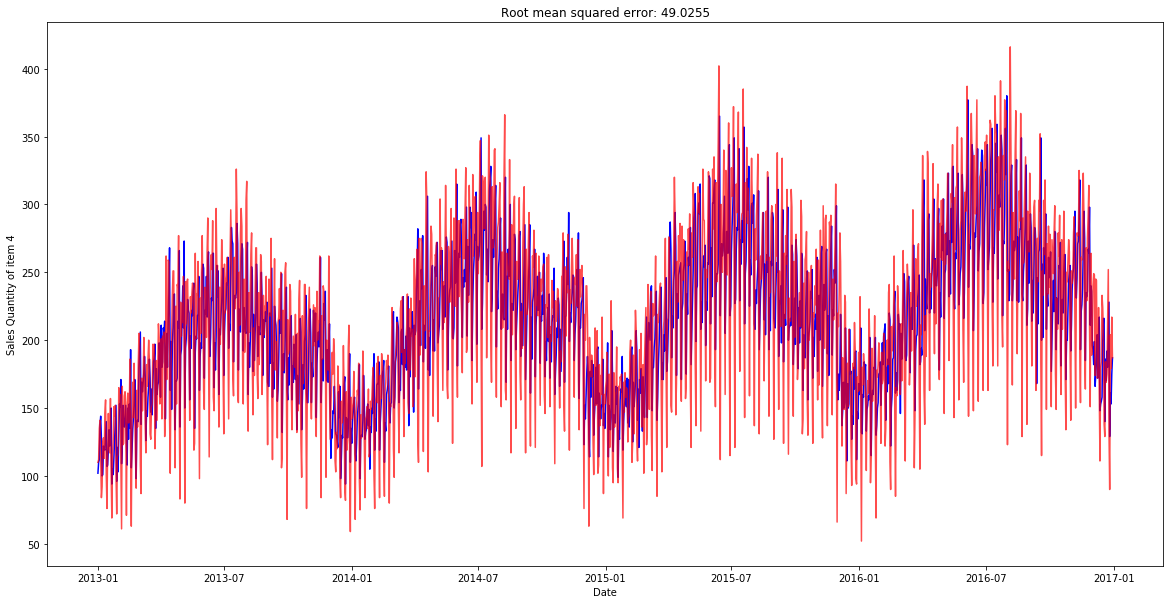

1460 1460


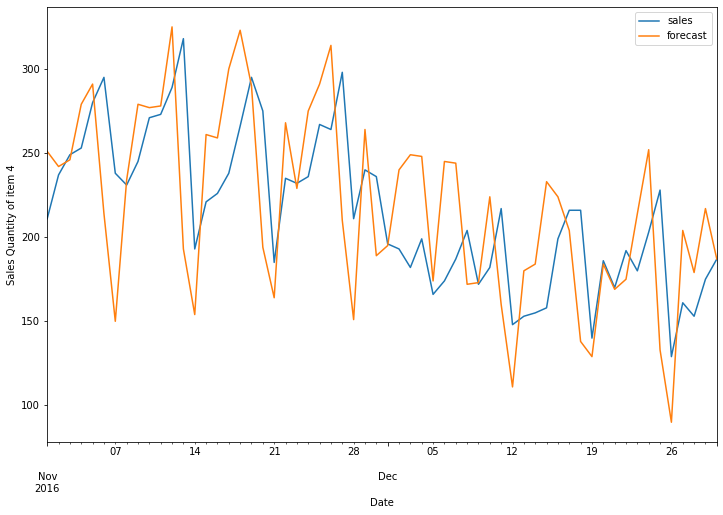

In [52]:
plt.figure(figsize=(20,10))
plt.plot(df.sales,color='blue')
plt.plot(x1,'r-', alpha=0.7)
plt.title('Root mean squared error: %.4f'% RMSE)
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()
print(len(df),len(x1))
df['forecast'] = x1.values
start_index =1400
end_index =start_index+365

df[start_index:end_index][['sales','forecast']].plot(figsize=(12, 8))
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()

## ii. Testing the predicted values

In [53]:
fitLen = len(results_ARIMA.fittedvalues)

lastTwo= len(results_ARIMA.fittedvalues)-2*365

c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


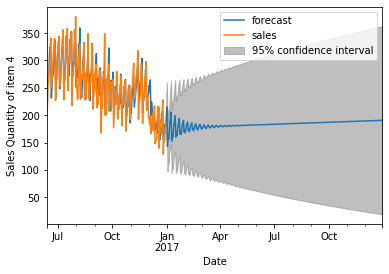

In [54]:
results_ARIMA.plot_predict(fitLen-200,fitLen+365)#start rows + end rows of forecast rows 18260+40
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()

c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


2016-12-31    199.285946
2017-01-01    215.131513
2017-01-02    142.765877
2017-01-03    164.916927
2017-01-04    156.374238
Freq: D, dtype: float64


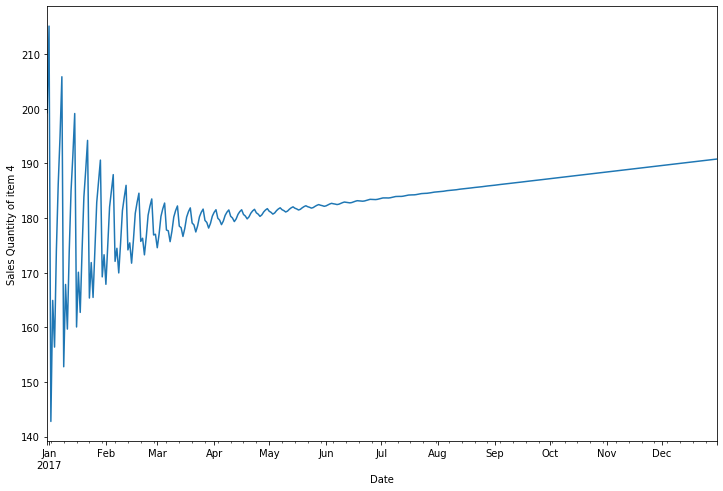

In [55]:
yearPrediction=results_ARIMA.predict(start='2016-12-31', end='2017-12-31', exog=None, typ='levels', dynamic=False) # this works
print(yearPrediction.head())

yearPrediction.plot(figsize=(12, 8))
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()

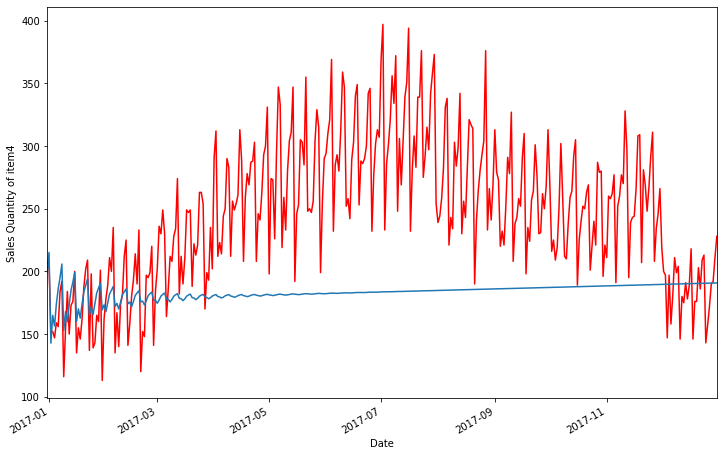

In [56]:
plt.plot(test.sales,color='red',)
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item"+str(itemno))
yearPrediction.plot(figsize=(12, 8))
plt.show()

In [57]:
#yearPrediction diff = orgscale - (orgscale-interval)
#orgscale = diff + (orgscale-interval
yearPrediction=results_ARIMA.predict(start='2016-12-31', end='2017-12-31', exog=None, typ='linear', dynamic=False)
from datetime import timedelta
j=0
orgscale =yearPrediction.copy()
for i in range(len(yearPrediction.index)):
    if j<=365:
               orgscale.values[j]= yearPrediction.values[j]+dffiltered.sales[pd.to_datetime(orgscale.index[j])-timedelta(days=365)]
    j+=1
 
print(orgscale)


2016-12-31    172.285946
2017-01-01    182.845567
2017-01-02    136.634364
2017-01-03    154.151050
2017-01-04    122.457311
2017-01-05    177.676319
2017-01-06    170.063516
2017-01-07    192.844783
2017-01-08    189.899456
2017-01-09    128.916089
2017-01-10    148.061465
2017-01-11    140.834298
2017-01-12    166.123257
2017-01-13    170.197262
2017-01-14    162.519479
2017-01-15    209.617021
2017-01-16    142.926850
2017-01-17    125.023552
2017-01-18    148.646545
2017-01-19    174.220153
2017-01-20    169.919058
2017-01-21    184.928209
2017-01-22    184.418413
2017-01-23    173.146030
2017-01-24    136.491238
2017-01-25    130.615473
2017-01-26    158.863577
2017-01-27    162.525170
2017-01-28    178.819341
2017-01-29    179.928959
                 ...    
2017-12-02    193.039789
2017-12-03    182.039878
2017-12-04    199.039641
2017-12-05    166.039359
2017-12-06    174.039151
2017-12-07    187.039231
2017-12-08    204.039484
2017-12-09    172.039721
2017-12-10    182.039800


c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [58]:
#out sample 
error = orgscale.values-test.values.reshape(test.values.shape[0])
highestScale = np.amax(test.values)
meanAbsoluteError = sum([abs(x) for x in error])/len(error)
squaredError = [x**2 for x in error]
meanError = sum(squaredError)/len(squaredError)
RMSE2 = meanError**0.5
print(RMSE2,meanAbsoluteError,highestScale)


45.19106686220422 34.87089144880842 397


The root mean squared error is  45.19106686220422


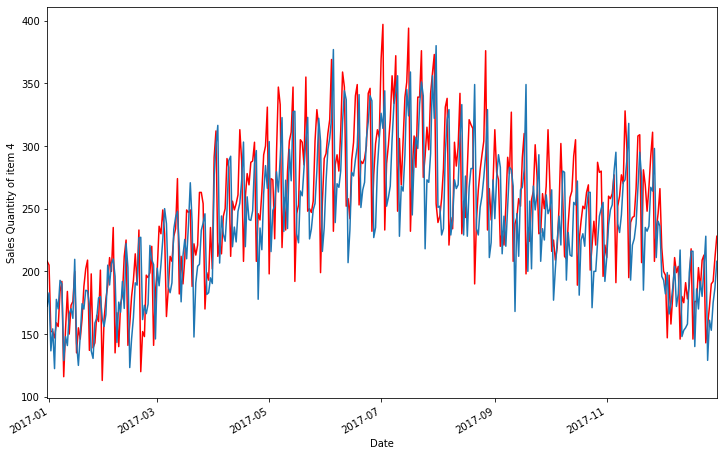

In [59]:
print("The root mean squared error is ",RMSE2)
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.plot(test.sales,color='red',)
orgscale.plot(figsize=(12, 8))
plt.show()

In [60]:
# print(test.head())
# print(orgscale.head())
# print(test.tail())
# print(orgscale.tail())

In [61]:

print('the Alkaike Information Criterion is ',results_ARIMA.aic)

the Alkaike Information Criterion is  13214.001489115679


# EXPORTING AS JSON

In [62]:
dft= pd.DataFrame({'date':orgscale.index, 'sales quantity':orgscale.values})

dft['date'] = pd.to_datetime(dft['date'])#convert to date time object
dft['item'] = itemno
print(dft.tail())

          date  sales quantity  item
361 2017-12-27      161.039328     4
362 2017-12-28      153.039350     4
363 2017-12-29      175.039469     4
364 2017-12-30      187.039595     4
365 2017-12-31      208.039649     4


In [63]:
export=dft.to_json(orient='records',date_format='iso')

In [64]:
print(export)
dft.to_json(path_or_buf=r'C:\Users\Acer\Desktop\minor\env\src\predicted{}.json'.format(itemno),orient='records',date_format='iso')

[{"date":"2016-12-31T00:00:00.000Z","sales quantity":172.2859463091,"item":4},{"date":"2017-01-01T00:00:00.000Z","sales quantity":182.8455667357,"item":4},{"date":"2017-01-02T00:00:00.000Z","sales quantity":136.6343642855,"item":4},{"date":"2017-01-03T00:00:00.000Z","sales quantity":154.1510499678,"item":4},{"date":"2017-01-04T00:00:00.000Z","sales quantity":122.4573106001,"item":4},{"date":"2017-01-05T00:00:00.000Z","sales quantity":177.6763194484,"item":4},{"date":"2017-01-06T00:00:00.000Z","sales quantity":170.0635157276,"item":4},{"date":"2017-01-07T00:00:00.000Z","sales quantity":192.8447826734,"item":4},{"date":"2017-01-08T00:00:00.000Z","sales quantity":189.8994564983,"item":4},{"date":"2017-01-09T00:00:00.000Z","sales quantity":128.9160893321,"item":4},{"date":"2017-01-10T00:00:00.000Z","sales quantity":148.0614649483,"item":4},{"date":"2017-01-11T00:00:00.000Z","sales quantity":140.8342982682,"item":4},{"date":"2017-01-12T00:00:00.000Z","sales quantity":166.1232570951,"item":4